In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

import os

def relpath(path):
    try:
        dirname = os.path.dirname(__file__)
    except:
        return '/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Git/PhD_Git/PhD_Thesis/notebooks/md_sim'
    return os.path.join(dirname, path)

sys.path.append(relpath("../../src/md_sim"))
sys.path.append("../../src/md_sim")

from load_lammps_log import load_thermo

In [4]:
def get_attr(attr, grid, temp, time):
    dfs, dt, n_atoms, run_steps = load_thermo(f'/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/strain_expansion/edip/grid_{grid}/{temp}K_8x8x8_{time}ns.log')
    equilib_df         =   dfs[0].iloc[:]
    release_df         =   dfs[1].iloc[:]
    return equilib_df['Step'], equilib_df[attr]

In [5]:
dfs, dt, n_atoms, run_steps = load_thermo('/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/strain_expansion/edip/grid_3_20/4000K_8x8x8_100ns.log')
#dfs, dt, n_atoms, run_steps = load_thermo('/home/benjamin/Documents/LAMMPS/strain_expansion/edip/grid_3_25/2000K_8x8x8_100ns.log')
dfs[0].keys()

Index(['Step', 'Temp', 'E_pair', 'E_mol', 'TotEng', 'Press'], dtype='object')

In [6]:
def pressure(grid,temp):
    dfs, dt, n_atoms, run_steps = load_thermo(f'/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/strain_expansion/edip/grid_{grid}/{temp}K_8x8x8_100ns.log')
    equilib_df         =   dfs[0].iloc[:]
    release_df         =   dfs[1].iloc[:]
    print(f"Grid: {grid}, Temp: {temp} : {int(np.mean(equilib_df['Press'].values[-200:]*1e-4))} GPa")

pressure("3_20","2000")
pressure("3_20","3000")
pressure("3_20","4000")
pressure("3_20","5000")
pressure("3_25","2000")
pressure("3_25","3000")
pressure("3_25","4000")
pressure("3_25","5000")
pressure("3_30","2000")
pressure("3_30","3000")
pressure("3_30","4000")
pressure("3_30","5000")
pressure("3_35","2000")
pressure("3_35","3000")
pressure("3_35","4000")
pressure("3_35","5000")

Grid: 3_20, Temp: 2000 : 148 GPa
Grid: 3_20, Temp: 3000 : 171 GPa
Grid: 3_20, Temp: 4000 : 194 GPa
Grid: 3_20, Temp: 5000 : 219 GPa
Grid: 3_25, Temp: 2000 : 113 GPa
Grid: 3_25, Temp: 3000 : 129 GPa
Grid: 3_25, Temp: 4000 : 148 GPa
Grid: 3_25, Temp: 5000 : 171 GPa
Grid: 3_30, Temp: 2000 : 83 GPa
Grid: 3_30, Temp: 3000 : 96 GPa
Grid: 3_30, Temp: 4000 : 112 GPa
Grid: 3_30, Temp: 5000 : 135 GPa
Grid: 3_35, Temp: 2000 : 58 GPa
Grid: 3_35, Temp: 3000 : 71 GPa
Grid: 3_35, Temp: 4000 : 85 GPa
Grid: 3_35, Temp: 5000 : 106 GPa


'\nax3             = ax.twinx()\nax3.plot(*get_attr("Temp",grid,temperature,"50"),label="Temp 50ns")\nax3.plot(*get_attr("Temp",grid,temperature,"100"),label="Temp 100ns")\nax3.plot(*get_attr("Temp",grid,temperature,"200"),label="Temp 200ns")\n'

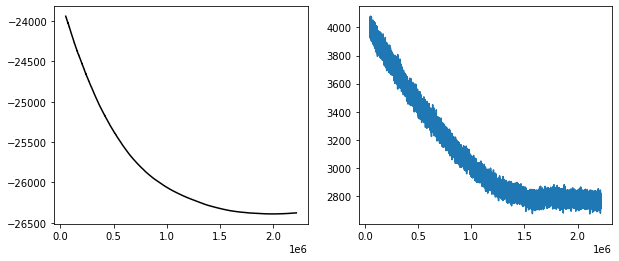

In [38]:
#plt.plot(release_df['Step'],release_df['v_press_GPa'])
fig, ax         =   plt.subplots(1,2,figsize=(10,4))
temperature     =   "4000"
grid            =   "3_20"

'''
ax.plot(*get_attr("Volume",grid,temperature,"50"),label="Volume 50ns")
ax.plot(*get_attr("Volume",grid,temperature,"100"),label="Volume 100ns")
ax.plot(*get_attr("Volume",grid,temperature,"200"),label="Volume 200ns")
'''

#ax[0].plot(*get_attr("Press",grid,temperature,"100")*np.array([[1],[1e-4]]),label="Pressure 100ns")
#ax[0].plot(*get_attr("Press",grid,temperature,"50")*np.array([[1],[1e-4]]),label="Pressure 50ns")
#ax[0].plot(*get_attr("Press",grid,temperature,"200")*np.array([[1],[1e-4]]),label="Pressure 200ns")

ax[1].plot(*get_attr("Temp",grid,temperature,"100"),label="Pressure 100ns")
#ax[1].plot(*get_attr("Temp",grid,temperature,"50"),label="Pressure 50ns")
#ax[1].plot(*get_attr("Temp",grid,temperature,"200"),label="Pressure 200ns")

ax2                 =   ax[0]
step, press         =   get_attr("Press",grid,temperature,"100")
step, vol           =   get_attr("Volume",grid,temperature,"100")
step, Etot          =   get_attr("TotEng",grid,temperature,"100")
press               *=  1e5


#step2, vol2           =   get_attr("Volume",grid,temperature,"200")
ax2.plot(step,Etot,label="Cube length",c="k")
#ax2.plot(vol,press,label="",c='b')
#ax2.plot(step2,vol2**(1/3)/8,label="Cube length 200 ns",c='k')
from lmfit import Model
def adiabat(V, k, const):
    return const / (V**k)

gmodel = Model(adiabat)
#result = gmodel.fit(press, V=vol,const=1e20,k=7)

#ax2.plot(vol, result.best_fit, '-', label='best fit',color='k')
#ax3                 =   ax[1].twinx()
#ax3.plot(step,vol**(1/3)/8,label="Cube length",c='k')
#ax3.plot(step2,vol2**(1/3)/8,label="Cube length 200 ns",c='k')
'''
ax3             = ax.twinx()
ax3.plot(*get_attr("Temp",grid,temperature,"50"),label="Temp 50ns")
ax3.plot(*get_attr("Temp",grid,temperature,"100"),label="Temp 100ns")
ax3.plot(*get_attr("Temp",grid,temperature,"200"),label="Temp 200ns")
'''


In [34]:
result

Timestep retreived from read dump. Manually setting to 0.0001 ps


No handles with labels found to put in legend.


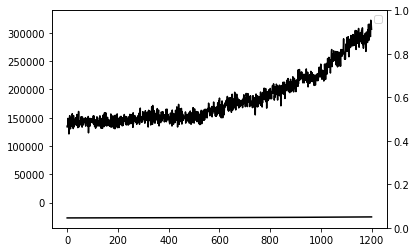

In [34]:
#plt.plot(release_df['Step'],release_df['v_press_GPa'])
dfs, dt, n_atoms, run_steps = load_thermo('/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/strain_expansion/edip/grid_3_25/2000K_8x8x8_300ns_restart.log')
release_df                  = dfs[0]


fig, ax     =   plt.subplots()
dE          =   release_df['TotEng'].values[1:] - release_df['TotEng'].values[:-1]

ax.plot(release_df['Press'].values[:1200],c='k')


ax2         =   ax.twinx()
ax.plot(release_df['TotEng'].values[:1200],c='k')
ax.legend()
#ax2.scatter(release_df['Step'].values[:-1:50],mismatch,c='k')

In [13]:
release_df['v_press_GPa']

0         11.105691
1         11.001075
2         10.890260
3         10.887660
4         10.862327
           ...     
2111     301.019630
2112     356.658110
2113     424.300020
2114    1108.578900
2115    8651.889000
Name: v_press_GPa, Length: 2116, dtype: float64

In [16]:
average.shape
release_df['Step'].values[:-1:10].shape
release_df['Volume'].values[-10:]

array([21951.294, 21951.373, 21951.451, 21951.53 , 21951.608, 21951.686,
       21951.765, 21951.843, 21951.922, 21952.   ])

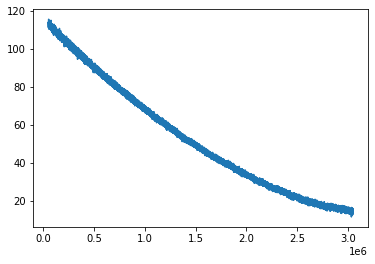

In [17]:
plt.plot(release_df['Step'], release_df['v_press_GPa'])

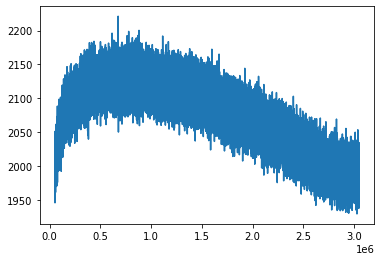

In [18]:
plt.plot(release_df['Step'], release_df['Temp'])